In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# For Data pre-processing

- https://developerzen.com/data-mining-handling-missing-values-the-database-bd2241882e72
- https://analyticsindiamag.com/5-ways-handle-missing-values-machine-learning-datasets/
- https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

In [57]:
test = pd.read_csv('./DataSet/Test.csv')
train = pd.read_csv('./DataSet/Train.csv')

In [58]:
train.isna().sum()

id_code                         0
current_date                    0
current_time                    0
source_name                     0
destination_name                0
train_name                      0
target                          0
country_code_source             1
longitude_source                1
latitude_source                 1
mean_halt_times_source          1
country_code_destination       33
longitude_destination          33
latitude_destination           33
mean_halt_times_destination    33
current_year                    0
current_week                    0
current_day                     0
is_weekend                      0
dtype: int64

In [59]:
test.isna().sum()

id_code                        0
current_date                   0
current_time                   0
source_name                    0
destination_name               0
train_name                     0
country_code_source            0
longitude_source               0
latitude_source                0
mean_halt_times_source         0
country_code_destination       0
longitude_destination          0
latitude_destination           0
mean_halt_times_destination    0
current_year                   0
current_week                   0
current_day                    0
is_weekend                     0
dtype: int64

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 19 columns):
id_code                        1284 non-null object
current_date                   1284 non-null object
current_time                   1284 non-null object
source_name                    1284 non-null object
destination_name               1284 non-null object
train_name                     1284 non-null object
target                         1284 non-null object
country_code_source            1283 non-null object
longitude_source               1283 non-null float64
latitude_source                1283 non-null float64
mean_halt_times_source         1283 non-null float64
country_code_destination       1251 non-null object
longitude_destination          1251 non-null float64
latitude_destination           1251 non-null float64
mean_halt_times_destination    1251 non-null float64
current_year                   1284 non-null int64
current_week                   1284 non-null int64
curre

In [61]:
# Calculate mean

mean_halt_times_source_mean  = train['mean_halt_times_source'].mean()

longitude_source_mean = train['longitude_source'].mean()
latitude_source_mean = train['latitude_source'].mean()

longitude_destination_mean = train['longitude_destination'].mean()
latitude_destination_mean = train['latitude_destination'].mean()

mean_halt_times_destination_mean = train['mean_halt_times_destination'].mean()



In [62]:
# replace missing values with mean of their respective columns

train["country_code_source"].fillna("whber",inplace=True)
train["country_code_destination"].fillna("whber",inplace=True)

train['mean_halt_times_source'].fillna(mean_halt_times_source_mean,inplace=True)
train['longitude_source'].fillna(longitude_source_mean,inplace=True)
train['latitude_source'].fillna(latitude_source_mean,inplace=True)
train['longitude_destination'].fillna(longitude_destination_mean,inplace=True)
train['latitude_destination'].fillna(latitude_destination_mean,inplace=True)
train['mean_halt_times_destination'].fillna(mean_halt_times_destination_mean,inplace=True)

In [63]:
train.isna().sum()

id_code                        0
current_date                   0
current_time                   0
source_name                    0
destination_name               0
train_name                     0
target                         0
country_code_source            0
longitude_source               0
latitude_source                0
mean_halt_times_source         0
country_code_destination       0
longitude_destination          0
latitude_destination           0
mean_halt_times_destination    0
current_year                   0
current_week                   0
current_day                    0
is_weekend                     0
dtype: int64

In [64]:
#removing the target
train.reset_index(inplace=True,drop=True)
target=train["target"]
#joining both train and test data for data cleaning
train["data"]="train"
train.drop(["target"],axis=1,inplace=True)
test["data"]="test"
data=pd.concat((train,test),ignore_index=True,axis=0)

In [65]:
#lets start to change the type of the data so that we can convert it into machine learning formal
data['source_name']=data['source_name'].str.replace("station","",case=False)
data['source_name']=data['source_name'].str.replace("$","")

#now change it from test and train
data['destination_name']=data['destination_name'].str.replace("station","",case=False)
data['destination_name']=data['destination_name'].str.replace("$","")

In [66]:
#now changing the datatype of these columns
data['source_name']=pd.to_numeric(data['source_name'])
data['destination_name']=pd.to_numeric(data['destination_name'])

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248 entries, 0 to 2247
Data columns (total 19 columns):
id_code                        2248 non-null object
current_date                   2248 non-null object
current_time                   2248 non-null object
source_name                    2248 non-null int64
destination_name               2248 non-null int64
train_name                     2248 non-null object
country_code_source            2248 non-null object
longitude_source               2248 non-null float64
latitude_source                2248 non-null float64
mean_halt_times_source         2248 non-null float64
country_code_destination       2248 non-null object
longitude_destination          2248 non-null float64
latitude_destination           2248 non-null float64
mean_halt_times_destination    2248 non-null float64
current_year                   2248 non-null int64
current_week                   2248 non-null int64
current_day                    2248 non-null object
is_week

In [68]:
#mapping the data on unique values
data["country_code_source"]=label_encoder.fit_transform(data["country_code_source"])

In [69]:
data["country_code_source"].head()

0    2
1    2
2    2
3    2
4    2
Name: country_code_source, dtype: int64

In [70]:
data["country_code_destination"].unique()

array(['whber', 'aqfre', 'qwnll', 'zxdec', 'logbp', 'wsluu'], dtype=object)

In [71]:
#mapping the data on unique values
data["country_code_destination"]=label_encoder.fit_transform(data["country_code_destination"])

In [72]:
data["country_code_destination"].head()

0    3
1    3
2    3
3    3
4    3
Name: country_code_destination, dtype: int64

In [73]:
data["current_day"]=data["current_day"].map({'Monday':1,'Tuesday':2,'Wednesday':3, 'Thursday':4, 'Friday':5, 
                         'Saturday':6, 'Sunday':7})
data["current_day"]=pd.to_numeric(data["current_day"])

In [74]:
data.tail(5)

,id_code,current_date,current_time,source_name,destination_name,train_name,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,data
2243,pnfrvyxsejnehwu,2016-10-29,09:14:45 AM,544,530,ICZVXA,2,3.710675,51.035896,309.014451,3,3.447848,51.092295,78.488439,2016,43,6,True,test
2244,omsilbnrgbvkeak,2016-10-29,10:17:59 AM,530,544,ICZVZA,2,3.447848,51.092295,78.488439,3,3.710675,51.035896,309.014451,2016,43,6,True,test
2245,vkjvqmaaguaeqde,2016-10-29,10:39:10 AM,178,147,ICRYYW,2,4.421101,51.217200,467.982659,3,4.356801,50.845658,634.164740,2016,43,6,True,test
2246,iutnjhogthfpymb,2016-10-29,10:59:55 AM,147,150,ICZVXY,2,4.356801,50.845658,634.164740,3,4.336531,50.835707,686.615607,2016,43,6,True,test
2247,xwqxedeqlnimclu,2016-10-29,11:48:37 AM,525,536,ICZVXW,2,3.216726,51.197226,164.419075,3,3.133864,51.312432,21.416185,2016,43,6,True,test


In [75]:
#getting the current month
xx=data["current_date"].str.split("-",expand=True)


data["current_year"]=xx[0]
data["current_month"]=xx[1]
data["current_day"]=xx[2]

In [76]:
#getting the hours of the time and converting it nto 24 hours format
a=data["current_time"].str.split(':',expand=True)
b=a[2].str.split(" ",expand=True)
m=a[1] 
a=a[0]
a=pd.to_numeric(a)
xx=np.where(b[1]=='AM',a+12,a)
xx=np.where(xx==24,0,xx)

hours=pd.DataFrame(xx)
minutes=pd.DataFrame(np.array(m))
data["hours_of_the_time"]=hours
data["minutes_of_the_time"]=minutes
del hours,xx
data.drop(["current_date","current_time",'id_code'],axis=1,inplace=True)

In [77]:
data.head(5)

,source_name,destination_name,train_name,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,data,current_month,hours_of_the_time,minutes_of_the_time
0,147,1,ICZVZS,2,4.356801,50.845658,634.16474,3,4.298829,50.92457,271.872701,2016,30,27,False,train,07,8,05
1,147,1,ICZVZS,2,4.356801,50.845658,634.16474,3,4.298829,50.92457,271.872701,2016,30,27,False,train,07,8,06
2,147,1,ICZVZS,2,4.356801,50.845658,634.16474,3,4.298829,50.92457,271.872701,2016,30,27,False,train,07,8,08
3,147,1,ICZVZS,2,4.356801,50.845658,634.16474,3,4.298829,50.92457,271.872701,2016,30,27,False,train,07,8,09
4,147,1,ICZVZS,2,4.356801,50.845658,634.16474,3,4.298829,50.92457,271.872701,2016,30,27,False,train,07,8,11


In [78]:
#changing the weekend into binary column
#data["is_weekend"].unique()
data["is_weekend"]=np.where(data["is_weekend"]==False,0,1)
data["is_weekend"]=pd.to_numeric(data["is_weekend"])

In [79]:
data["train_name"].unique()

array(['ICZVZS', 'UNDEFINED', 'ICWVYA', 'ICZVXY', 'ICXUYS', 'ICZVAT',
       'SZAYASA', 'ICVAS', 'ICTUSAY', 'ICYSAS', 'ICXUAS', 'ICXZXZ',
       'THARXYY', 'PTAAR', 'LVUW', 'ICRYWA', 'ICZVXS', 'ICZTXR', 'ICVWA',
       'ICTZR', 'ICVZV', 'LVRZ', 'ICWWY', 'ICVWX', 'LVRY', 'ICYSXY',
       'LVSY', 'LVUX', 'SWYZSX', 'ICXYXV', 'ICYSZX', 'SZAYASR', 'ICXUXZ',
       'ICVAR', 'ICZVAR', 'ICXXXU', 'ICXZZW', 'ICWYXU', 'ICYXZS',
       'ICWYYA', 'ICWWYA', 'ICYSZW', 'ICTXU', 'ICYYXZ', 'ICYSXZ',
       'TGVRSYU', 'ICTZA', 'ICVXY', 'ICZVAU', 'ICYYXA', 'ICZSXT',
       'ICWYXT', 'ICWYZU', 'ICZVXT', 'ICWYAR', 'ICZSXZ', 'ICVZY',
       'SZAXSVT', 'ICVXS', 'ICYRXT', 'ICXUAV', 'ICXWZV', 'LYWUZ',
       'ICWWXX', 'ICWXXX', 'ICXRXV', 'ICVZR', 'LVVRX', 'ICXWXY', 'ICRZZ',
       'ICYAZW', 'ICWXZY', 'ICTZU', 'ICYWZT', 'LYVTR', 'ICXWXV', 'ICYSXX',
       'ICXWZR', 'ICWYZA', 'ICYAXX', 'ICVZA', 'ICYZZY', 'ICYUZZ', 'ICVXW',
       'ICYZZX', 'ICYSWA', 'ICZSAR', 'ICXUZY', 'ICZVZX', 'ICZSZU',
       'ICVWY', 'ICZSXA'

In [80]:
del data["train_name"]

In [81]:
#getting the training and testing data into the original form
train=data[data['data']=='train']
test=data[data['data']=='test']
print(train.shape,test.shape)
train.drop(['data'],axis=1,inplace=True)
test.drop(['data'],axis=1,inplace=True)
print(train.shape,test.shape)
del data

(1284, 18) (964, 18)
(1284, 17) (964, 17)


/home/buckaroo/nlp/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [82]:
train["target"]=target
train["target"]=train["target"].map({'low':0,'high':2,'medium':1})

In [83]:
train.head()

,source_name,destination_name,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,current_month,hours_of_the_time,minutes_of_the_time,target
0,147,1,2,4.356801,50.845658,634.16474,3,4.298829,50.92457,271.872701,2016,30,27,0,07,8,05,2
1,147,1,2,4.356801,50.845658,634.16474,3,4.298829,50.92457,271.872701,2016,30,27,0,07,8,06,2
2,147,1,2,4.356801,50.845658,634.16474,3,4.298829,50.92457,271.872701,2016,30,27,0,07,8,08,2
3,147,1,2,4.356801,50.845658,634.16474,3,4.298829,50.92457,271.872701,2016,30,27,0,07,8,09,2
4,147,1,2,4.356801,50.845658,634.16474,3,4.298829,50.92457,271.872701,2016,30,27,0,07,8,11,2


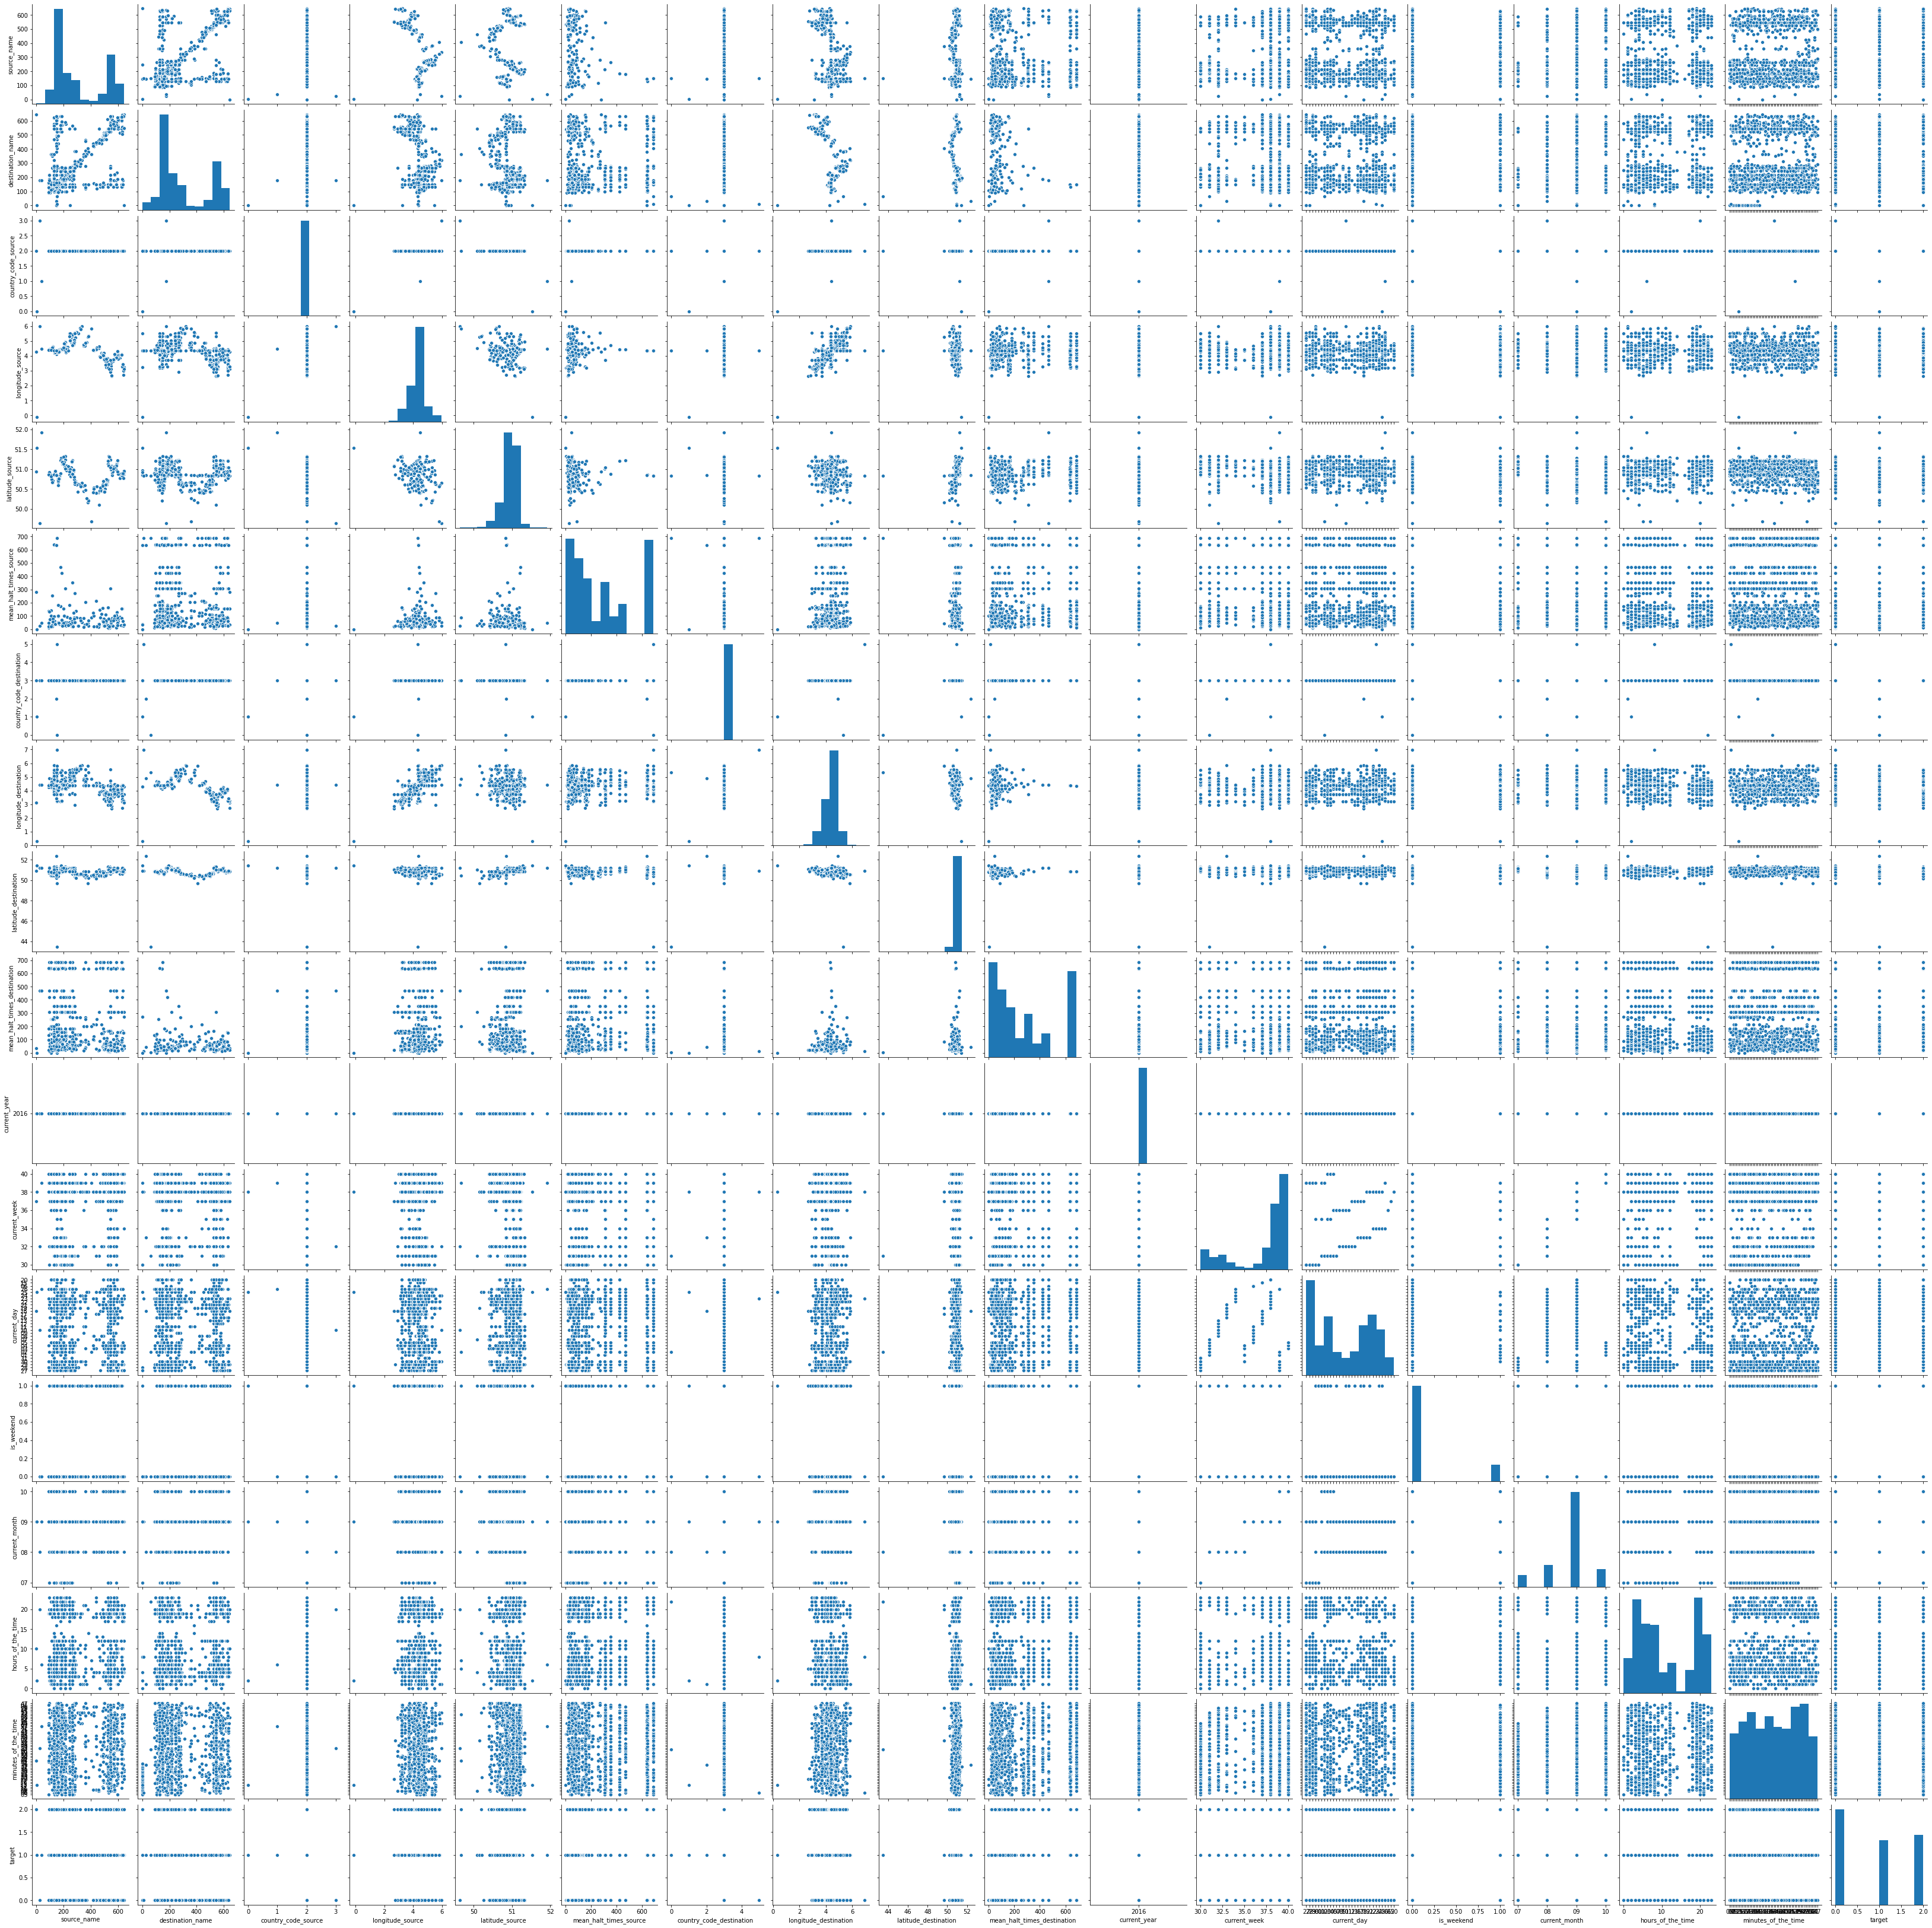

In [84]:
sns.pairplot(train)

In [86]:
train.to_csv('DataSet/train_preprocessed.csv')

In [87]:
train.shape

(1284, 18)

In [91]:
( train.shape[0] / 100 ) * 80

1027.2

In [93]:
720 + 480

1200